<a href="https://colab.research.google.com/github/YKefasu/Vlad-SD-Google-Colab/blob/master/Vladmandic_SD_A1111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<font color="#CC3E3E" size="6">⚠️ <u><b>PERHATIAN</b></u> ⚠️</font></center>

> <font color="#00CED1">**INFORMASI**:</font>

1. Pastikan Subscribe ke 👉 [youtube.com/@yosiakefas](https://www.youtube.com/@yosiakefas) dan Join [Discord Server](https://discord.gg/j8qmYPAGQh) untuk mendapatkan UPDATE Terbaru.
2. GOOGLE SECARA BRUTAL MELARANG PENGGUNAAN STABLE DIFFUSION

<center>

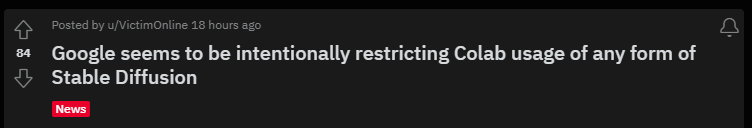

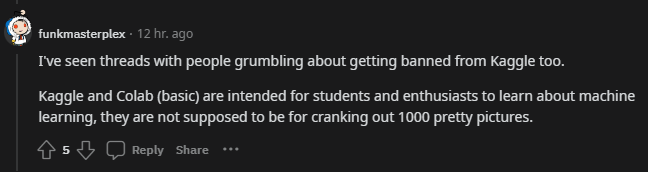

</center>

<center><font color="#CC3E3E" size="6">⚠️ <u><b>!! <font color="#00CED1" size="6">WAJIB GPU MODE</font> !!</b></u> ⚠️</font></center>


</br>

<center><font color="#00CED1" size="6">👇 <u><b>PENJELASAN</b></u> 👇</font></br>

 <a href="https://youtu.be/q8XO6defTy0"><img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgv7nV8kvVm_FL7k0EZUjoyBD2rS4wj_pA4uqBh8A5B_kbvHUZ2uAbsUNLLo4cCbyNsp9M4EBhqt4RY7ZaQQDWkhwlBuFM0FOhTTf92IFz0jdldbUmcvkD5T454-7HEw2OP3hsJozUggq7H8d8-BIUcidZN72tW551eyTPUs7MVoLcHcH62PSSpIOthMk0/s640/DeffGCSDXLa.png" width="512"/></a></a>
</center>
</br></br>

## **<center>Subscribe Youtube Channel & Join Server Discord Kita 😅</center>**
<center><font size="12">👉</font> <a href="https://trakteer.id/yosiakefas/tip" target="_blank"><img id="wse-buttons-preview" src="https://cdn.trakteer.id/images/embed/trbtn-blue-5.png" height="60" style="border: 0px; height: 60px;" alt="Trakteer Saya"></a><font size="14">🙏</font></center>
</br>
<div align="center">
 <a href="https://www.youtube.com/channel/UCsqTcFMsAlegRsUyfyKe_5A"><img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiZxKLHX32VYBBOvxvKUDka6uX0wKYYg46EurNzQBUHjaxd2dSJ82paUaJ1OTzpMMt4R7KUuvsbcOLuAg_9NJ1WaRJev8vmRhWea4xfg0AhjSaX2sp3ZFZGD490AArNICVDqzYvrjTqWbKFHxFLE2AYBVaIrGvkwPTqJCroDTvEb43sNuM5wHHCecd6/s350/subscribe-5408999_640.png" width="310"/></a>ㅤㅤ
 <a href="https://discord.gg/j8qmYPAGQh"><img src="https://cdn.shopify.com/s/files/1/0562/9329/4253/files/Discord_button_480x480.png" width="350"/></a></div>

 ___

In [ ]:
#@markdown #STEP 1️⃣: Persiapan

#@markdown Keterangan: Clone Vladmandic SD.Next, and Connect to Google Drive
from IPython.display import clear_output, display, HTML
import os
import time
import subprocess
import shutil
from datetime import timedelta
from google.colab import drive
from IPython.utils import capture
from subprocess import getoutput
from urllib.parse import unquote
from google.colab.output import eval_js

def check_gpu():
    print("\033[96m")  # Cyan text
    print('⌚ Checking GPU...', end='')
    output = getoutput('nvidia-smi --query-gpu=gpu_name --format=csv')
    if "name" in output:
        gpu_name = output[5:]
        print('\r✅ Current GPU:', gpu_name, flush=True)
    else:
        print('\r\033[91m❎ ERROR: No GPU detected. Lakukan Step dibawah ini.\n', flush=True)
        # Additional code for displaying an image and message
        display(HTML("<img src='https://i.ibb.co/HC9KH17/NVIDIA-Share-23-01-02-173037.png' width='800px'/>"))
        print('\033[91m\nJika tertulis "Cannot connect to GPU backend", berarti telah mencapai batas pemakaian. Silahakn istirahat untuk hari ini...')
        display(HTML("<center><img src='https://media.tenor.com/RY9NX67klacAAAAi/sad-cute.gif' width='272px'/></center>"))
        time.sleep(5)
        from google.colab import runtime
        runtime.unassign()

def clone_repositories():
    SD_Next_Commit_hash = "last commit"  # @param {'type': 'string'}
    if SD_Next_Commit_hash == "last commit":
        subprocess.run(["git", "clone", "--depth=1", "https://github.com/vladmandic/automatic.git"])
    else:
        subprocess.run(["git", "clone", "https://github.com/vladmandic/automatic.git"])
        subprocess.run(["git", "checkout", SD_Next_Commit_hash], cwd="automatic")

    !git clone https://github.com/YKefasu/Vlad-SD-Google-Colab.git
    clear_output()

def install_requirements():
    %cd /content/automatic
    !pip install --use-feature=fast-deps -r requirements.txt
    !pip install timm==0.6.13 --upgrade
    !pip install onnxruntime==1.15.1
    !pip install --upgrade huggingface_hub
    !pip install wget
    !pip install tqdm
    !pip install pyngrok
    !apt -y install -qq aria2 libcairo2-dev pkg-config python3-dev
    clear_output()

def install_extensions():
    %cd /content/automatic/extensions-builtin/
    !git clone https://github.com/YKefasu/sd-artists-ui-tweak sd-artists-ui-tweak
    !git clone https://github.com/Iyashinouta/sd-model-downloader sd-model-downloader

    remove_ext = '/content/Vlad-SD-Google-Colab/DataFiles/RM ControlNet.txt'
    base_directory = '/content/automatic/extensions-builtin/'
    with open(remove_ext, 'r') as file:
        folder_names = file.read().splitlines()
    for folder_name in folder_names:
        folder_path = os.path.join(base_directory, folder_name)
        try:
            shutil.rmtree(folder_path, ignore_errors=True)
            print(f"Folder '{folder_name}' removed successfully.")
        except Exception as e:
            print(f"Error occurred while removing folder '{folder_name}': {e}")

    with open('/content/Vlad-SD-Google-Colab/DataFiles/Extension.txt', 'r') as file:
        for line in file:
            repo_url = line.strip()
            !git clone $repo_url
    clear_output()

def clone_MiDaS():
    %cd /content/automatic/repositories
    !git clone https://github.com/isl-org/MiDaS MiDaS
    clear_output()

def update_style_css():
    file_style_css = '/content/automatic/extensions-builtin/sd-artists-ui-tweak/style.css'
    os.remove(file_style_css)
    shutil.move("/content/Vlad-SD-Google-Colab/DataFiles/style.css", "/content/automatic/extensions-builtin/sd-artists-ui-tweak/")

def move_config_files():
    Start_with_ControlNet = "No"  # @param ["No", "Yes"]

    # Check if "/content/automatic/ui-config.json" exists and remove it if it does
    if os.path.exists("/content/automatic/config.json"):
        os.remove("/content/automatic/config.json")

    if Start_with_ControlNet == "No":
        # Copy the file "/content/Vlad-SD-Google-Colab/SD Original/No CNet/config.json" to "/content/automatic"
        source_file = "/content/Vlad-SD-Google-Colab/SD Original/No CNet/config.json"
        destination_file = "/content/automatic/config.json"
        shutil.copy(source_file, destination_file)
    elif Start_with_ControlNet == "Yes":
        # Copy the file "/content/Vlad-SD-Google-Colab/SD Original/config.json" to "/content/automatic"
        source_file = "/content/Vlad-SD-Google-Colab/SD Original/config.json"
        destination_file = "/content/automatic/config.json"
        shutil.copy(source_file, destination_file)
    else:
        print("Invalid value for Start_with_ControlNet. Please choose either 'No' or 'Yes'.")

    # Move "/content/Vlad-SD-Google-Colab/SD Original/ui-config.json" to "/content/automatic"
    shutil.move("/content/Vlad-SD-Google-Colab/SD Original/ui-config.json", "/content/automatic")
    clear_output()

def install_jemalloc():
    %cd /content/automatic/
    !apt -y update -qq
    !apt -y install libjemalloc-dev
    %env LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libjemalloc.so.2
    clear_output()

def download_model():
    %cd /content/automatic/models/
    !mkdir -p Stable-diffusion
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Lykon/DreamShaper/resolve/main/DreamShaper_7_pruned.safetensors  -d /content/automatic/models/Stable-diffusion/ -o DreamShaper_7_pruned.safetensors
    clear_output()

def connect_to_drive():
    %cd /content
    drive.mount('/content/drive')
    clear_output()

# Check GPU
start_colab = int(time.time()) - 5
check_gpu()

# Clone repositories
clone_repositories()

# Pip Install Req
install_requirements()

# Install jemalloc and its development package
install_jemalloc()

# Ekstension Install
install_extensions()

# Clone MiDaS
clone_MiDaS()

# Update sd-artists style css
update_style_css()

# Move config files
move_config_files()

# Download Model
download_model()

# Connect to Google Drive
connect_to_drive()

%cd /content/automatic
!git show --oneline -s
print("✅ Done", "success")


___
___

# STEP 2️⃣.1️⃣: Perlengkapan ControlNet Models, VAE, dan UPSCALERs + Install Extensions


In [ ]:
#@markdown #Optional🎲: Pre-Install Extensions
#@markdown >**Note: <font color="red">Tanggung sendiri jika terjadi ERROR setelah install Extensions</font> 👈

from IPython.display import clear_output
import os
import urllib.request

Extensions = "None" #@param ["None", "3d-open-pose-editor", "deforum", "SAG", "depth-lib", "huggingface", "additional-networks", "infinite-image-browsing", "roop", "civitai-browser", "TemporalKit", "All Extensions"]

def git_clone_from_file(extension):
    file_path = f"/content/Vlad-SD-Google-Colab/DataFiles/Extensions/{extension}.txt"
    if os.path.exists(file_path):
        with open(file_path) as f:
            repo_url = f.read().strip()
        destination = f"/content/automatic/extensions/{extension}"
        !git clone --quiet $repo_url $destination
        print(f"Success install '{extension}'")
    else:
        print(f"Error: '{extension}.txt' file not found.")

def install_roop():
    git_clone_from_file("roop")
    print("Success install 'roop'")

def install_temporal_kit():
    git_clone_from_file("TemporalKit")
    !sudo curl -L --silent https://github.com/BtbN/FFmpeg-Builds/releases/download/latest/ffmpeg-master-latest-linux64-gpl.tar.xz -o /usr/local/bin/ffmpeg.tar.xz
    clear_output()
    %cd /usr/local/bin/
    clear_output()
    !7z e /usr/local/bin/ffmpeg.tar.xz
    clear_output()
    !7z e /usr/local/bin/ffmpeg.tar
    clear_output()
    !sudo chmod a+rx /usr/local/bin/ffmpeg
    clear_output()
    %cd /content/
    !sudo curl -L --silent https://mkvtoolnix.download/appimage/MKVToolNix_GUI-70.0.0-x86_64.AppImage -o /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage
    !sudo chmod u+rx /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage
    !sudo ln -s /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage /usr/local/bin/mkvmerge
    !sudo chmod a+rx /usr/local/bin/mkvmerge
    clear_output()

    # Download latest FFmpeg static build.
    exist = !which ffmpeg
    if not exist:
        !curl --silent https://johnvansickle.com/ffmpeg/releases/ffmpeg-release-amd64-static.tar.xz -o ffmpeg.tar.xz \
        && tar -xf ffmpeg.tar.xz && rm ffmpeg.tar.xz
        ffmdir = !find . -iname ffmpeg-*-static
        path = os.environ['PATH']
        path = path + ':' + ffmdir[0]
        os.environ['PATH'] = path

    !which ffmpeg
    !pip install --quiet ffmpy
    print("Success install 'TemporalKit'")

# Download the model file if "roop" is selected
if Extensions == "roop":
    roop_path = '/content/automatic/models/insightface'

    # Ensure the folder exists
    if not os.path.exists(roop_path):
        os.makedirs(roop_path)

    # Change to the download directory
    os.chdir(roop_path)

    inswapper128model_url = 'https://github.com/facefusion/facefusion-assets/releases/download/models/inswapper_128.onnx'
    inswapper128model_filename = os.path.basename(inswapper128model_url)

    # Use urllib.request to download the model with content disposition
    urllib.request.urlretrieve(inswapper128model_url, os.path.join(roop_path, inswapper128model_filename))

    # Check if the model file was downloaded successfully
    if os.path.exists(os.path.join(roop_path, inswapper128model_filename)):
        print(f"Downloaded '{inswapper128model_filename}' to '{roop_path}'")
    else:
        print(f"Failed to download '{inswapper128model_filename}'")

    # Change back to the original working directory
    os.chdir('/content')

# Extra code to download and extract zip file after git clone
if Extensions == "depth-lib":
    zip_url = "https://civitai.com/api/download/models/71811"
    destination = f"/content/automatic/extensions/{Extensions}/maps/"

    # Download the zip file using wget with content-disposition
    !wget --content-disposition $zip_url -P /content/

    # Extract the zip file
    import zipfile

    zip_file_path = "/content/900HandsLibraryForDepth_v10.zip"
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination)

    # Delete the zip file
    os.remove(zip_file_path)

    print(f"Success downloading and extracting files for '{Extensions}'")

if Extensions == "None":
    # Skip all code and exit
    pass

elif Extensions == "All Extensions":
    %cd /content/automatic/extensions/
    extensions_list = ["3d-open-pose-editor", "deforum", "SAG", "depth-lib", "huggingface", "additional-networks", "infinite-image-browsing", "roop", "civitai-browser", "TemporalKit"]
    for extension in extensions_list:
        if extension == "civitai-browser":
            !git clone --quiet https://github.com/Vetchems/sd-civitai-browser
            print("Success install 'civitai-browser'")
        else:
            git_clone_from_file(extension)

else:
    %cd /content/automatic/extensions/
    if Extensions == "civitai-browser":
        !git clone --quiet https://github.com/Vetchems/sd-civitai-browser
        print("Success install 'civitai-browser'")
    else:
        git_clone_from_file(Extensions)

clear_output()
print("✅ Done", "success")

In [ ]:
#@markdown #Optional🎲: Controlnet 1.1 SD1.5 Models install
#@markdown **Note: Pilih Model ControlNet Seperlunya atau Download "All Models (21GB)".

import os
import subprocess
import shutil
from tqdm.auto import tqdm

# Define paths as variables
controlnet_rename_path = "/content/Vlad-SD-Google-Colab/DataFiles/CNet Rename/controlnet-rename.txt"
extensions_builtin_folder_path = "/content/automatic/extensions-builtin"

# Function to check if the folder name is the same as the new folder name and rename if needed
def rename_folder_if_needed(folder_path, new_folder_name):
    folder_name = os.path.basename(folder_path)
    if folder_name == new_folder_name:
        print("Folder name is already the same. Skipping the renaming process.")
    else:
        old_folder_path = os.path.join(folder_path, new_folder_name)
        new_folder_path = os.path.join(folder_path, "sd-controlnet")
        try:
            shutil.move(old_folder_path, new_folder_path)
            print(f"Folder renamed from '{new_folder_name}' to 'sd-controlnet'.")
        except OSError as e:
            if e.errno == 39:
                print("Destination folder is not empty. Skipping the renaming process.")
            else:
                print(f"An error occurred: {e}")
        except Exception as e:
            print(f"An error occurred: {e}")

# Read the contents of the txt file and construct the new folder name
with open(controlnet_rename_path, 'r') as file:
    new_folder_name = file.read().strip()

# Rename the folder if needed
rename_folder_if_needed(extensions_builtin_folder_path, new_folder_name)

clear_output()

# Download The models
Model = "None" #@param ["None", "Canny", "Depth", "Lineart", "MLSD", "Normal", "OpenPose", "Scribble", "Seg", "ip2p", "Shuffle", "Inpaint", "Softedge", "Lineart_Anime", "Tile", "All Models (21GB)"]

model_urls = {
    "Canny": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_canny.pth',
    "Depth": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11f1p_sd15_depth.pth',
    "Lineart": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart.pth',
    "MLSD": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_mlsd.pth',
    "Normal": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_normalbae.pth',
    "OpenPose": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_openpose.pth',
    "Scribble": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_scribble.pth',
    "Seg": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_seg.pth',
    "ip2p": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11e_sd15_ip2p.pth',
    "Shuffle": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11e_sd15_shuffle.pth',
    "Inpaint": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_inpaint.pth',
    "Softedge": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_softedge.pth',
    "Lineart_Anime": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15s2_lineart_anime.pth',
    "Tile": 'https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11f1e_sd15_tile.pth',
    # Add other model URLs here...
}

output_path = "/content/automatic/extensions-builtin/sd-controlnet/models/"
os.makedirs(output_path, exist_ok=True)  # Create the output directory if it doesn't exist

def download_model(model_url, output_path):
    filename = os.path.basename(model_url)
    output_file = os.path.join(output_path, filename)
    subprocess.run(['aria2c', '-x', '16', '-s', '16', '-o', filename, '-d', output_path, model_url]) # Download with aria2c
    return filename

if Model == "All Models (21GB)":
    for model in model_urls:
        model_url = model_urls[model]
        download_model(model_url, output_path)
    print("✓ Done", "success")
elif Model != "None":
    model_url = model_urls.get(Model)
    if model_url:
        download_model(model_url, output_path)
        print("✓ Done", "success")
    else:
        print("Invalid model selected.")
else:
    clear_output()
    print("No Model selected. Finish...")

# Read the contents of the txt file and construct the new folder path
with open(controlnet_rename_path, 'r') as file:
    new_folder_name = file.read().strip()
new_folder_path = os.path.join(extensions_builtin_folder_path, new_folder_name)

# Check if the old folder exists and if the folder names are different, then rename
old_folder_path = os.path.join(extensions_builtin_folder_path, "sd-controlnet")
if os.path.exists(old_folder_path) and os.path.basename(old_folder_path) != new_folder_name:
    shutil.move(old_folder_path, new_folder_path)
    print(f"Folder renamed from 'sd-controlnet' to '{new_folder_name}'.")
elif os.path.basename(old_folder_path) == new_folder_name:
    print("Folder name is already the same. No need to rename.")
else:
    print("The folder does not exist.")

clear_output()
print("✅ Done", "success")


In [ ]:
#@markdown #Optional🎲: Download VAE Collection (+Negtive Embedings)
#@markdown  **Note: Pilih Model ControlNet Seperlunya atau Download "All VAE (6,1GB) + Negtive Embedings"

%cd /content/automatic/models
!mkdir -p embeddings/negative
%cd /content/automatic/models/embeddings/negative/
!git clone --quiet https://huggingface.co/embed/negative

import os
import urllib.request
from IPython.display import clear_output

VAE = "All VAE (6,1GB)" #@param ["None", "WD-v2.vae.pt", "blessed-fix.vae.pt", "blessed.vae.pt", "blessed2.vae.pt", "clearvae_main.safetensors", "cute_vae.safetensors", "grapefruitVAE_v1.pt", "kl-f8-anime.ckpt", "kl-f8-anime2.ckpt", "nai.vae.pt", "orangemix.vae.pt", "pastel-waifu-diffusion.vae.pt", "rmada-cold-vae.ckpt", "vae-ft-mse-840000-ema-pruned.ckpt", "vaeextremecolors_v10.pt", "All VAE (6,1GB)"]

VAE_urls = {
    "WD-v2.vae.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/WD-v2.vae.pt',
    "blessed-fix.vae.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/blessed-fix.vae.pt',
    "blessed.vae.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/blessed.vae.pt',
    "blessed2.vae.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/blessed2.vae.pt',
    "clearvae_main.safetensors": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/clearvae_main.safetensors',
    "cute_vae.safetensors": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/cute%20vae.safetensors',
    "grapefruitVAE_v1.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/grapefruitVAE_v1.pt',
    "kl-f8-anime.ckpt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/kl-f8-anime.ckpt',
    "kl-f8-anime2.ckpt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/kl-f8-anime2.ckpt',
    "nai.vae.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/nai.vae.pt',
    "orangemix.vae.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/orangemix.vae.pt',
    "pastel-waifu-diffusion.vae.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/pastel-waifu-diffusion.vae.pt',
    "rmada-cold-vae.ckpt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/rmada-cold-vae.ckpt',
    "vae-ft-mse-840000-ema-pruned.ckpt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/vae-ft-mse-840000-ema-pruned.ckpt',
    "vaeextremecolors_v10.pt": 'https://huggingface.co/Kefasu/sd-vae-collection/resolve/main/vaeextremecolors_v10.pt'
}

output_path = "/content/automatic/models/VAE/"

os.makedirs(output_path, exist_ok=True)  # Create the output directory if it doesn't exist

def download_model(model_url, output_path):
    filename = os.path.basename(model_url)
    output_file = os.path.join(output_path, filename)
    urllib.request.urlretrieve(model_url, output_file)
    return filename

if VAE == "All VAE (6,1GB)":
    for model in VAE_urls:
        model_url = VAE_urls[model]
        download_model(model_url, output_path)
    print("✓ Done", "success")
elif VAE != "None":
    model_url = VAE_urls.get(VAE)
    download_model(model_url, output_path)
    print("✓ Done", "success")
else:
    clear_output()
    print("No VAE selected. Finish...")

# Clear the output to keep the notebook clean
clear_output()
print("✅ Done", "success")

In [ ]:
#@markdown #Optional🎲: Download UPSCALERs

import os
import urllib.request
from IPython.display import clear_output

Upscalers = "All Upscalers (2,3GB)" #@param ["None", "4x-UltraSharp.pth", "4x_CountryRoads_377000_G.pth", "4x_Fatality_Comix_260000_G.pth", "4x_RealisticRescaler_100000_G.pth", "4x_Valar_v1.pth", "4x_fatal_Anime_500000_G.pth", "4x_foolhardy_Remacri.pth", "A_ESRGAN_Single.pth", "LADDIER1_282500_G.pth", "WaifuGAN_v3_30000.pth", "lollypop.pth", "sudo_rife4_269.662_testV1_scale1.pth", "Nickelback [Upscaler Pack]", "NMKD [Upscaler Pack]", "NoiseToner [Upscaler Pack]", "PSNR [Upscaler Pack]", "UniversalUpscalerV2 [Upscaler Pack]", "All Upscalers (2,3GB)"]

upscalers_urls = {
    "4x-UltraSharp.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/4x-UltraSharp.pth',
    "4x_CountryRoads_377000_G.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/4x_CountryRoads_377000_G.pth',
    "4x_Fatality_Comix_260000_G.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/4x_Fatality_Comix_260000_G.pth',
    "4x_RealisticRescaler_100000_G.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/4x_RealisticRescaler_100000_G.pth',
    "4x_Valar_v1.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/4x_Valar_v1.pth',
    "4x_fatal_Anime_500000_G.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/4x_fatal_Anime_500000_G.pth',
    "4x_foolhardy_Remacri.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/4x_foolhardy_Remacri.pth',
    "A_ESRGAN_Single.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/A_ESRGAN_Single.pth',
    "LADDIER1_282500_G.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/LADDIER1_282500_G.pth',
    "WaifuGAN_v3_30000.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/WaifuGAN_v3_30000.pth',
    "lollypop.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/lollypop.pth',
    "sudo_rife4_269.662_testV1_scale1.pth": 'https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/sudo_rife4_269.662_testV1_scale1.pth',
}

upscalers_pack_urls = {
    "Nickelback [Upscaler Pack]": '/content/Vlad-SD-Google-Colab/Upscaler Pack/Nickelback [Upscaler Pack].txt',
    "NMKD [Upscaler Pack]": '/content/Vlad-SD-Google-Colab/Upscaler Pack/NMKD [Upscaler Pack].txt',
    "NoiseToner [Upscaler Pack]": '/content/Vlad-SD-Google-Colab/Upscaler Pack/NoiseToner [Upscaler Pack].txt',
    "PSNR [Upscaler Pack]": '/content/Vlad-SD-Google-Colab/Upscaler Pack/PSNR [Upscaler Pack].txt',
    "UniversalUpscalerV2 [Upscaler Pack]": '/content/Vlad-SD-Google-Colab/Upscaler Pack/UniversalUpscalerV2 [Upscaler Pack].txt',
}

output_path = "/content/automatic/models/ESRGAN/"

os.makedirs(output_path, exist_ok=True)  # Create the output directory if it doesn't exist

def download_model(model_url, output_path):
    if model_url is None:
        return None

    filename = os.path.basename(model_url)
    output_file = os.path.join(output_path, filename)
    urllib.request.urlretrieve(model_url, output_file)
    return filename

if Upscalers == "All Upscalers (2,3GB)":
    for model in upscalers_urls:
        model_url = upscalers_urls[model]
        download_model(model_url, output_path)

    for model in upscalers_pack_urls:
        txt_file_path = upscalers_pack_urls[model]
        with open(txt_file_path, 'r') as file:
            urls = file.read().splitlines()
        for url in urls:
            download_model(url, output_path)

    print("✓ Done", "success")
elif Upscalers != "None":
    if Upscalers in upscalers_pack_urls:
        txt_file_path = upscalers_pack_urls[Upscalers]
        with open(txt_file_path, 'r') as file:
            urls = file.read().splitlines()
        for url in urls:
            download_model(url, output_path)
        print("✓ Done", "success")
    else:
        model_url = upscalers_urls.get(Upscalers)
        download_model(model_url, output_path)
        print("✓ Done", "success")
else:
    clear_output()
    print("No Upscaler selected. Finish...")

clear_output()
print("✅ Done", "success")

<details>
<summary><font size="5"><font color="#00CED1"> <b>Info UPSCALERs PACK List :</b></font> ( Klik diSini untuk Lihat )</font></summary>

- Nickelback [Upscaler Pack]:
  - 4x_Nickelback_70000G.pth
  - 4x_NickelbackFS_72000_G.pth

- NMKD [Upscaler Pack]:
  - 1x_NMKD-BrightenRedux_200k.pth
  - 1x_NMKD-YandereInpaint_375000_G.pth
  - 2x_NMKD-DeGIF_210000_G.pth
  - 4x_NMKD-Siax_200k.pth
  - 4x_NMKD-Superscale-Artisoftject_210000_G.pth
  - 4x_NMKD-Superscale-SP_178000_G.pth
  - 4x_NMKD-UltraYandere-Lite_280k.pth
  - 4x_NMKD-UltraYandere_300k.pth
  - 4x_NMKD-UpgifLiteV2_210k.pth
  - 4x_NMKD-YandereNeoXL_200k.pth
  - 4x_NMKDSuperscale_Artisoft_120000_G.pth
  - 8x_NMKD-Superscale_150000_G.pth
  - 8x_NMKD-Typescale_175k.pth
  - 8x_NMKD-Faces_160000_G.pth

- NoiseToner [Upscaler Pack]:
  - 1x_NoiseToner-Uniform-Detailed_100000_G.pth
  - 1x_NoiseToner-Poisson-Detailed_108000_G.pth

- PSNR [Upscaler Pack]:
  - 4xPSNR.pth
  - 8xPSNR.pth
  - 16xPSNR.pth

- UniversalUpscalerV2 [Upscaler Pack]:
  - 4x_UniversalUpscalerV2-Sharper_103000_G.pth
  - 4x_UniversalUpscalerV2-Sharp_101000_G.pth
  - 4x_UniversalUpscalerV2-Neutral_115000_swaG.pth

- LAINNYA:
  - 4x-UltraSharp.pth
  - 4x_CountryRoads_377000_G.pth
  - 4x_Fatality_Comix_260000_G.pth
  - 4x_RealisticRescaler_100000_G.pth
  - 4x_Valar_v1.pth
  - 4x_fatal_Anime_500000_G.pth
  - 4x_foolhardy_Remacri.pth
  - A_ESRGAN_Single.pth
  - LADDIER1_282500_G.pth
  - WaifuGAN_v3_30000.pth
  - lollypop.pth
  - sudo_rife4_269.662_testV1_scale1.pth

</details>


---

# STEP 2️⃣.2️⃣: Perlengkapan Chekpoint, LoRA/LyCORIS, dan Embeddings TI
> <font color="#00CED1" size="5">**Informasi**:</font>

Untuk menghindari <font color="#CC3E3E">**ERROR**</font> harap gunakan Tools dibwah untuk mendownload Models/Checkpoint, Sandard LoRA, LoCon/LyCORIS, ataupun Textual Inversion. Atau bisa coba gunakan "Model Downloader" di WebUI.

# <font color="#ECED0C">**Untuk Lebih dari 1 Download Pisahkan Link dengan KOMA "," contoh: 👇**</font>

![Image in a markdown cell](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgmx1QC1QnND4x7d8erlHZzOUTxyvIZXpfoKlOL-lPwXkGYVj5RNuhyCD8lWJrSzTWJ0DXxdrywE1VFz3uMkyaHevMUUBn9CR1Zq1LAd5hX8-4rwg2o5l2Pb08kD1zsZVpLoMfwq-ERRzX2AEBxR4WEzUA0uZP2ShrQicJl4sECKQ07FGZKHZ5n_6V7E9k/s981/画像_2023-07-12_114732788.png)

In [ ]:
#@markdown #Optional🧩: Models Downloader
from IPython.display import clear_output
import os
import requests
from urllib.parse import unquote

def download_model(Type, DirectLink_URL):
    if Type == "None" or not DirectLink_URL:
        print("Skipping download as no valid Type or DirectLink_URL provided.")
        return

    output_path = "/content/automatic/models/"

    if Type == "Checkpoint":
        output_path += "Stable-diffusion/"
    elif Type == "LoRA":
        output_path += "Lora/"
    elif Type == "LoCon/LyCORIS":
        output_path += "LyCORIS/"
    elif Type == "Textual Inversion":
        output_path += "embeddings/"
    else:
        print("Invalid type specified.")
        return

    # Create the directories if they don't exist
    os.makedirs(output_path, exist_ok=True)

    urls = [url.strip() for url in DirectLink_URL.split(",")]

    for url in urls:
        response = requests.get(url, stream=True)

        if response.status_code == 200:
            content_disposition = response.headers.get('content-disposition')
            if content_disposition:
                filename = unquote(content_disposition.split('filename=')[1])
            else:
                filename = unquote(url.split("/")[-1])  # Extracting the filename from the URL

            # Remove double quotes and semicolons from the filename
            filename = filename.replace('"', '').replace(';', '')

            filename = os.path.join(output_path, filename)  # Modify the filename to include the output path

            if not os.path.exists(filename):
                print("Downloading file:", filename)
                chunk_size = 5242880  # 5 MB
                with open(filename, 'wb') as f:
                    for chunk in response.iter_content(chunk_size=chunk_size):
                        if chunk:
                            f.write(chunk)
                print("File downloaded successfully.")
            else:
                print("File already exists:", filename)
        else:
            print("Failed to download the file:", url)

    # Clear the output to keep the notebook clean
    clear_output()

    # Print the success message
    print("✅ Done", "success")

# Call the function with the first set of parameters
Type1 = "Checkpoint"  # @param ["None", "Checkpoint", "LoRA", "LoCon/LyCORIS", "Textual Inversion"]
DirectLink_URL1 = ""  # @param {'type': 'string'}
download_model(Type1, DirectLink_URL1)

# Call the function with the second set of parameters
Type2 = "None"  # @param ["None", "Checkpoint", "LoRA", "LoCon/LyCORIS", "Textual Inversion"]
DirectLink_URL2 = ""  # @param {'type': 'string'}
download_model(Type2, DirectLink_URL2)



---
---


# STEP 3️⃣: START

> <font color="#ECED0C" size="5">**Informasi diBACA dulu👇**:</font>

1. LoRA sudah MENJADI SATU dengan LyCORIS.
2. Hiresfix = Second pass (+beberapa tambahan)
3. <font color="#CC3E3E">**INSTALL EKSTENSI SENDIRI**</font> di dalam WebUI untuk MENCEGAH SALAH PAHAM.
4. Pake NGROK!!
---

In [ ]:
#@markdown #Step 3️⃣🅰️ (Original SD): Launch SD.Next [`Colab UPDATE: 05 September 2023 08:06 AM (GMT+7)`]
#@markdown ______
import os
import threading
import requests
import logging
import urllib.request
from pyngrok import ngrok
from IPython.display import display, HTML
from huggingface_hub import cached_assets_path
from IPython.display import clear_output

# --Function AntiDissconnect
%cd /content/automatic
clear_output()
audio_url = "https://raw.githubusercontent.com/KoboldAI/KoboldAI-Client/main/colab/silence.m4a"
# Function AntiDissconnect in the background
def play_audio(url):
    display(HTML(f'<audio src="{url}" controls autoplay style="display:none"></audio>'))
# Create a separate thread for AntiDissconnect
audio_thread = threading.Thread(target=play_audio, args=(audio_url,))
audio_thread.start()

# Continue with your code execution here
# Disable logging for the pyngrok module to suppress the warnings
logging.getLogger("pyngrok").setLevel(logging.ERROR)

#@markdown Copy AuthToken dari https://dashboard.ngrok.com/get-started/your-authtoken ke 👇  ( WAJIB DI ISI 👇)
ngrok_token = ""  # @param {'type': 'string'}

# Move the ngrok configuration file from the XDG-compliant location to the legacy location
os.system("mv /root/.config/ngrok/ngrok.yml /root/.ngrok2/ngrok.yml")

# Set the ngrok configuration directory to the legacy location
os.environ["NGROK_CONFIG_PATH"] = "/root/.ngrok2/ngrok.yml"

# Create an Event object to signal when ngrok is ready
ngrok_ready_event = threading.Event()

# Function to install ngrok via TGZ file
def install_ngrok():
    os.system("wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz")
    os.system("sudo tar xvzf ngrok-stable-linux-amd64.tgz -C /usr/local/bin")
    os.remove("ngrok-stable-linux-amd64.tgz")  # Remove the TGZ file after installation
    ngrok_ready_event.set()  # Signal that ngrok installation is complete

# Function to start ngrok and print the ngrok URL when the local URL is accessible
def start_ngrok():
    ngrok.set_auth_token(ngrok_token)
    public_url = ngrok.connect(7860, "http").public_url
    # Convert to HTTPS by replacing "http://" with "https://"
    public_url_https = public_url.replace("http://", "https://", 1)  # Use count=1 to replace only the first occurrence

    # Print the ngrok URL once the local URL is accessible
    url_printed = False
    while True:
        try:
            response = requests.get("http://127.0.0.1:7860")
            if response.status_code == 200 and not url_printed:
                print("+++ Subscribe to: https://youtube.com/@yosiakefas")
                print("Ngrok URL:", public_url_https)
                print("+++")
                url_printed = True  # Set the flag to indicate that the URL has been printed
                break
        except requests.ConnectionError:
            pass

    ngrok_ready_event.set()  # Signal that ngrok tunnel is ready

# Install ngrok via TGZ file in a separate thread
install_thread = threading.Thread(target=install_ngrok)
install_thread.start()

# Wait for ngrok installation to complete
ngrok_ready_event.wait()

# Create a Timer to allow the main thread to continue after 5 seconds
timer = threading.Timer(1, lambda: None)  # A dummy timer function to unblock the main thread after 5 seconds

# Start ngrok in a separate thread
start_thread = threading.Thread(target=start_ngrok)
start_thread.start()

# Start the timer to unblock the main thread after 5 seconds
timer.start()

# Wait for the main thread to unblock after the timer expires
timer.join()

# Continue with the next code here
# Your next code here...
#@markdown ______
#@markdown Silahkan Ganti Jika punya Config Sendiri 👇
config = "/content/automatic/config.json"  # @param {'type': 'string'}
uiconfig = "/content/automatic/ui-config.json"  # @param {'type': 'string'}

%env LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libjemalloc.so.2
!COMMANDLINE_ARGS="--share --no-hashing --insecure --config $config --ui-config $uiconfig" REQS_FILE="requirements.txt" python launch.py

# Terminate ngrok and release any running tunnels
ngrok.kill()

---
---

</br>

</br>

## **<center>DiBuat dengan<font color="#FF4BD4"> *SEPENUH HATI* ❤️</font> by [youtube.com/@yosiakefas](https://youtube.com/@yosiakefa)**
<center><a href="https://trakteer.id/yosiakefas/tip" target="_blank"><img id="wse-buttons-preview" src="https://cdn.trakteer.id/images/embed/trbtn-blue-5.png" height="60" style="border: 0px; height: 60px;" alt="Trakteer Saya"></a></center>

<div align="center">
 <a href="https://www.youtube.com/channel/UCsqTcFMsAlegRsUyfyKe_5A"><img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiZxKLHX32VYBBOvxvKUDka6uX0wKYYg46EurNzQBUHjaxd2dSJ82paUaJ1OTzpMMt4R7KUuvsbcOLuAg_9NJ1WaRJev8vmRhWea4xfg0AhjSaX2sp3ZFZGD490AArNICVDqzYvrjTqWbKFHxFLE2AYBVaIrGvkwPTqJCroDTvEb43sNuM5wHHCecd6/s350/subscribe-5408999_640.png" width="310"/></a>ㅤㅤ
 <a href="https://discord.gg/j8qmYPAGQh"><img src="https://cdn.shopify.com/s/files/1/0562/9329/4253/files/Discord_button_480x480.png" width="350"/></a></div>

# Advance Tools 🔧

In [ ]:
#@markdown #Tools🔧: Remove Images MetaData【 UNTESTED! 】
#@markdown Support Batch Process or Single Image. If Batch Process input Folder Path!
from PIL import Image
import os

def remove_metadata(image_path):
    try:
        img = Image.open(image_path)
        img_without_metadata = Image.new(img.mode, img.size)
        img_without_metadata.putdata(list(img.getdata()))

        output_filename = os.path.splitext(os.path.basename(image_path))[0] + " - Removed MetaData"
        output_path = os.path.join(os.path.dirname(image_path), output_filename)

        img_without_metadata.save(output_path + os.path.splitext(image_path)[1])

        print(f"Successfully processed: {image_path}")
    except Exception as e:
        print(f"Failed to process: {image_path}. Error: {e}")

def process_images(input_path):
    if os.path.isfile(input_path):
        remove_metadata(input_path)
    elif os.path.isdir(input_path):
        for root, _, files in os.walk(input_path):
            for file in files:
                if file.lower().endswith(('.jpg', '.png', '.tiff', '.jp2', '.webp')):
                    image_path = os.path.join(root, file)
                    remove_metadata(image_path)
    else:
        print("Invalid input. Please provide a valid file or folder path.")

# Set the input path here: # Set the path to your image file or folder containing images
Input_Path =  ""  # @param {'type': 'string'}

process_images(Input_Path)


In [ ]:
#@markdown #Tools🔧: Copy Model From Google Drive【 UNTESTED! 】
#@markdown "Copy Path" Model yg mau diCopy ke "File_PATH"

import shutil
import os

# Parameters
Type = "Checkpoint"  # @param ["None", "Checkpoint", "LoRA", "LoCon/LyCORIS", "Textual Inversion"]
File_PATH = ""  # @param {'type': 'string'}

output_path = "/content/automatic/models/"

if Type == "Checkpoint":
    output_path += "Stable-diffusion/"
elif Type == "LoRA":
    output_path += "Lora/"
elif Type == "LoCon/LyCORIS":
    output_path += "LyCORIS/"
elif Type == "Textual Inversion":
    output_path += "embeddings/"
else:
    print("Invalid type specified.")

# Check if the source file exists
if os.path.isfile(File_PATH):
    # Check if the destination folder exists, create it if not
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Copy the file to the destination folder
    shutil.copy(File_PATH, output_path)
    print(f"File copied to {output_path}")
else:
    print(f"Source file {File_PATH} does not exist.")


---